In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df = pd.DataFrame(np.genfromtxt("data/bitcoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))
ethereum_df = pd.DataFrame(np.genfromtxt("data/ethereum_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [278]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""


In [279]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]
new_headers_ethereum = ethereum_df.iloc[0]
ethereum_df.columns = new_headers
ethereum_df = ethereum_df[1:]

In [280]:
df.head(5)

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""
5,"""2025-09-08T00:00:00.000Z""","""2025-09-08T23:59:59.999Z""","""2025-09-08T15:26:00.000Z""","""2025-09-08T02:22:00.000Z""","""2781""",111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78,2232377995774.42,"""2025-09-08T23:59:59.999Z"""


In [281]:
df.columns.to_list()

['\ufefftimeOpen',
 'timeClose',
 'timeHigh',
 'timeLow',
 'name',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'timestamp']

In [282]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)
ethereum_df.drop(['\ufefftimeOpen', 'timeClose', 'timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow', 'close'], axis=1, inplace=True)

In [283]:
ethereum_df.rename(columns={'open': 'eth_open', 'high': 'eth_high', 'low': 'eth_low', 'volume': 'eth_volume'}, inplace=True)

In [284]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')


In [285]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [286]:
df

,timeClose,open,high,low,close,volume
1,363 days,115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45
2,362 days,113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3
3,361 days,111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11
4,360 days,112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09
5,359 days,111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78
...,...,...,...,...,...,...
360,4 days,60309.0018795135,61664.0673338615,59218.2524421004,61649.6787266514,40990702890.6
361,3 days,58192.5093438557,61316.0913839546,57628.0717661941,60308.5375947655,38075570117.66
362,2 days,59185.22685956,59205.5103578251,57501.3391727673,58192.5068714421,32032822113.39
363,1 days,60000.7283175086,60381.9166672998,58696.3094180022,59182.8353338828,18120960866.97


In [287]:
int(df['timeClose'].iloc[0].days)

363

In [288]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))
ethereum_df["eth_open"] = (ethereum_df["eth_open"].astype(float))
ethereum_df["eth_high"] = (ethereum_df["eth_high"].astype(float))
ethereum_df["eth_low"] = (ethereum_df["eth_low"].astype(float))
ethereum_df["eth_volume"] = (ethereum_df["eth_volume"].astype(float))

In [289]:
df

,timeClose,open,high,low,close,volume
1,363,115507.792956,116769.382525,114794.484351,116101.580896,5.478573e+10
2,362,113961.428094,115522.543870,113453.839309,115507.537527,4.568507e+10
3,361,111531.247880,114275.252781,110940.076863,113955.358955,5.637747e+10
4,360,112077.577274,113225.440041,110776.700308,111530.549982,4.598448e+10
5,359,111163.017798,112869.235698,110630.605598,112071.431089,4.021281e+10
...,...,...,...,...,...,...
360,4,60309.001880,61664.067334,59218.252442,61649.678727,4.099070e+10
361,3,58192.509344,61316.091384,57628.071766,60308.537595,3.807557e+10
362,2,59185.226860,59205.510358,57501.339173,58192.506871,3.203282e+10
363,1,60000.728318,60381.916667,58696.309418,59182.835334,1.812096e+10


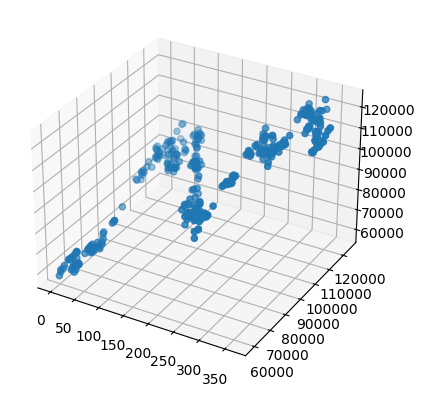

In [290]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df['timeClose']
ys = df['high']
zs = df['close']
ax.scatter(xs, ys, zs)
plt.show()

In [291]:
X_sing = df['timeClose'].values.reshape(-1, 1)
X_multi = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume']], ethereum_df[['eth_open', 'eth_high', 'eth_low', 'eth_volume']]], axis=1)
y = df['close'].values.reshape(-1, 1)

In [293]:
X_train_sing, X_test_sing, y_train_sing, y_test_sing = train_test_split(X_sing, y, test_size=0.2)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2)

In [316]:
degree = 7
polyreg_sing = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
polyreg_sing.fit(X_train_sing, y_train_sing)

line_of_best_fit = LinearRegression()
line_of_best_fit.fit(X_sing, y)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_predicted_sing = polyreg_sing.predict(X_test_sing)
r2_sing = r2_score(y_test_sing, y_predicted_sing)
y_predicted_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_predicted_multi)
print(r2_sing)
print(r2_multi)

0.8973869684714344
0.9965792371228566


In [319]:
cross_val_score(model_multi, X_multi, y, cv=10).mean()

np.float64(0.9274540289954114)

In [320]:
y_predicted = polyreg_sing.predict(X_sing)
y_pred = line_of_best_fit.predict(X_sing)

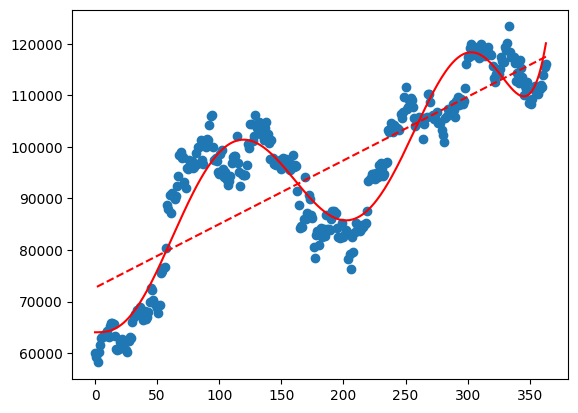

In [324]:
plt.scatter(X_sing, y)
plt.plot(X_sing, y_predicted, color='red', label='Line of Best Fit')
plt.plot(X_sing, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.show()